In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from data_gen import imageLoader
from U_net import simple_unet_model
import keras
import matplotlib.pyplot as plt
import glob

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 4)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │      1,744 │ input_layer[0][0] │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv3d[0][0]      │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │      6,928 │ dropout[0][0]     │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ conv3d_1[0][0]    │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 64, 64,    │     13,856 │ max_pooling3d[0]… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv3d_2[0][0]    │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │     27,680 │ dropout_1[0][0]   │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 32, 32,    │     55,360 │ max_pooling3d_1[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv3d_4[0][0]    │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 32, 32,    │    110,656 │ dropout_2[0][0]   │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 16, 16,    │          0 │ conv3d_5[0][0]    │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_6 (Conv3D)   │ (None, 16, 16,    │    221,312 │ max_pooling3d_2[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv3d_6[0][0]    │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_7 (Conv3D)   │ (None, 16, 16,    │    442,496 │ dropout_3[0][0]   │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_3     │ (None, 8, 8, 8,   │          0 │ conv3d_7[0][0]  

 Total params: 5,646,260 (21.54 MB)

 Trainable params: 5,646,260 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
img_dir="C:/Users/yashv/Downloads/BraTS2020_TrainingData (1)/input_data_3channels/images/"
mask_dir="C:/Users/yashv/Downloads/BraTS2020_TrainingData (1)/input_data_3channels/masks/"
img_list=os.listdir(img_dir)
mask_list=os.listdir(mask_dir)
#print(len(img_list))
n=len(img_list)
print(img_list)

['image_0.npy', 'image_1.npy', 'image_10.npy', 'image_100.npy', 'image_101.npy', 'image_102.npy', 'image_103.npy', 'image_104.npy', 'image_105.npy', 'image_106.npy', 'image_108.npy', 'image_11.npy', 'image_110.npy', 'image_111.npy', 'image_112.npy', 'image_113.npy', 'image_114.npy', 'image_115.npy', 'image_116.npy', 'image_117.npy', 'image_118.npy', 'image_119.npy', 'image_12.npy', 'image_120.npy', 'image_122.npy', 'image_123.npy', 'image_124.npy', 'image_125.npy', 'image_126.npy', 'image_127.npy', 'image_128.npy', 'image_129.npy', 'image_13.npy', 'image_130.npy', 'image_131.npy', 'image_132.npy', 'image_133.npy', 'image_134.npy', 'image_135.npy', 'image_136.npy', 'image_137.npy', 'image_139.npy', 'image_14.npy', 'image_140.npy', 'image_142.npy', 'image_143.npy', 'image_144.npy', 'image_145.npy', 'image_146.npy', 'image_147.npy', 'image_148.npy', 'image_149.npy', 'image_15.npy', 'image_150.npy', 'image_151.npy', 'image_152.npy', 'image_153.npy', 'image_154.npy', 'image_155.npy', 'image

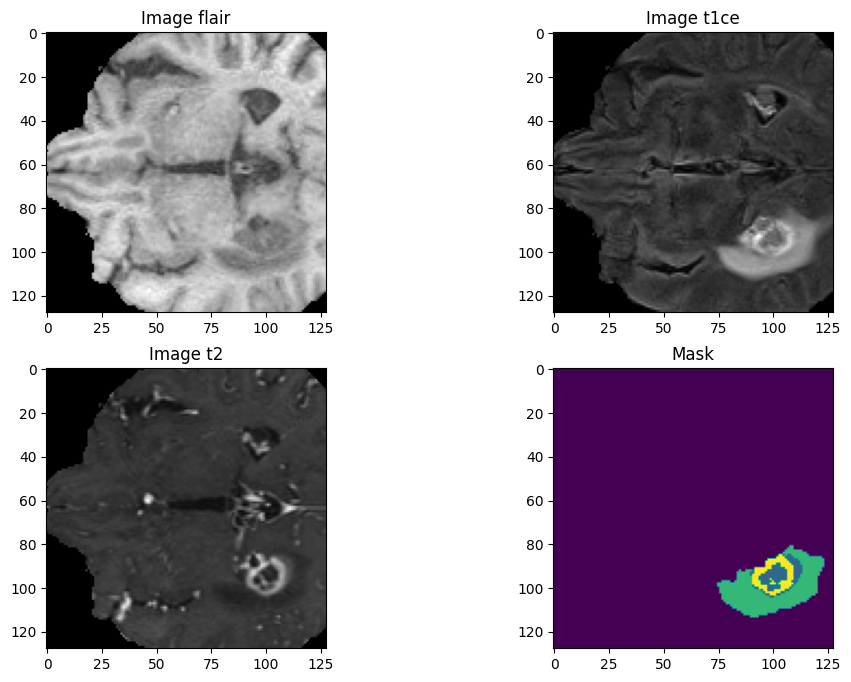

In [3]:
img_num = 2
test_img = np.load(img_dir+img_list[img_num])
test_mask = np.load(mask_dir+mask_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=50
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [4]:
batch_size=2

train_img_datagen = imageLoader(img_dir, img_list,mask_dir, mask_list, batch_size)
img, msk = train_img_datagen.__next__()

In [5]:
# wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss() 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `keras` framework.


In [6]:
steps_per_epoch = len(img_list)//batch_size #344/3=172

model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=4, 
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
# print(model.summary())

# print(model.input_shape)
# print(model.output_shape)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 4)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_19 (Conv3D)  │ (None, 128, 128,  │      1,744 │ input_layer_1[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv3d_19[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_20 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_9[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_4     │ (None, 64, 64,    │          0 │ conv3d_20[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_21 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_4[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv3d_21[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_22 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_10[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_5     │ (None, 32, 32,    │          0 │ conv3d_22[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_23 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_5[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv3d_23[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_24 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_11[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_6     │ (None, 16, 16,    │          0 │ conv3d_24[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_25 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_6[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv3d_25[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_26 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_12[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_7     │ (None, 8, 8, 8,   │          0 │ conv3d_26[0][0] 

 Total params: 5,646,260 (21.54 MB)

 Trainable params: 5,646,260 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history=model.fit(img,msk,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          )

Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.1508 - iou_score: 0.0325 - loss: 0.6641
Epoch 2/100


c:\Users\yashv\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.2146 - iou_score: 0.0178 - loss: 0.6078
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.2747 - iou_score: 0.0068 - loss: 0.6030
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.3303 - iou_score: 0.0057 - loss: 0.5995
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3763 - iou_score: 0.0191 - loss: 0.5919
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4170 - iou_score: 0.0554 - loss: 0.5754
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4552 - iou_score: 0.0960 - loss: 0.5599
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4957 - iou_score: 0.1208 - loss: 0.5541
Epoch 9/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5357 - iou_score: 0.1339 - loss: 0.5504
Epoch 10/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5683 - iou_score: 0.1423 - loss: 0.5428
Epoch 11/100
172/172 ━━━━━━━━━

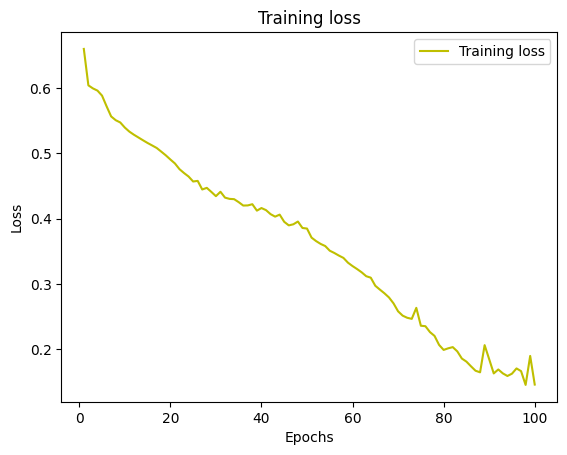

In [9]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


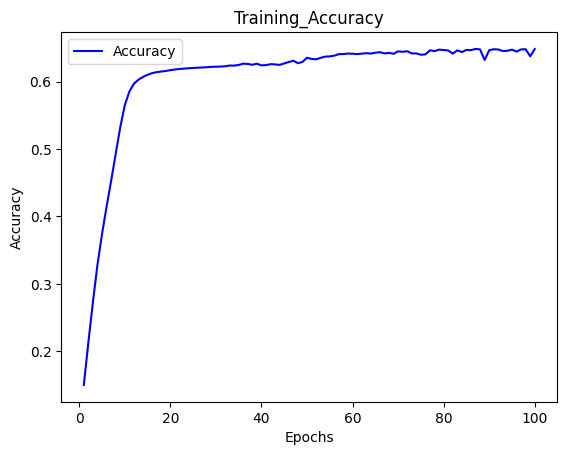

In [11]:
loss = history.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Accuracy')
plt.title('Training_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()